<a href="https://colab.research.google.com/github/Vinodhini96/LetsGrowMore_Internship_task/blob/main/LetsGrowMore_task_4_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction and Forecasting using Stacked LSTM

by

Vinodhini Rajamanickam

Data Science Project

## import libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

## Data Loading

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


## Exploratory Data Analysis

In [3]:
#check for shape of the data

df.shape

(2035, 8)

In [4]:
#baisc information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
# Basic statistics
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [6]:
#check for null values
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
#duplicate values
df.duplicated().sum()

0

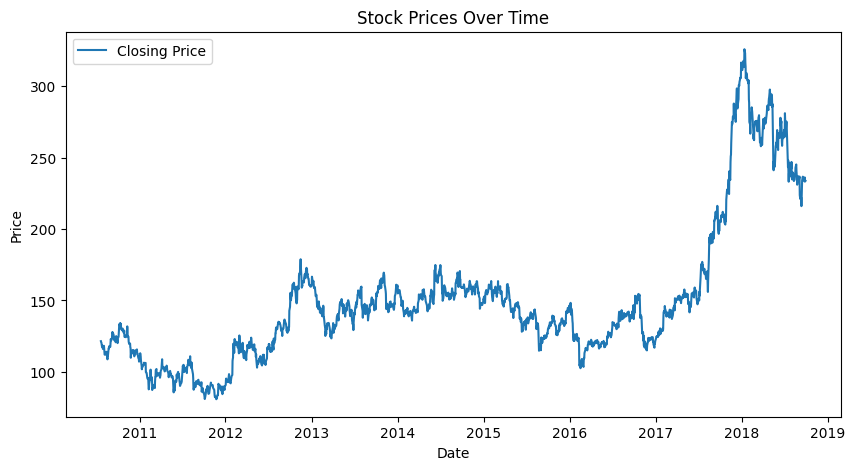

In [8]:
#  plot the stock prices over time to get a sense of how they have been changing

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

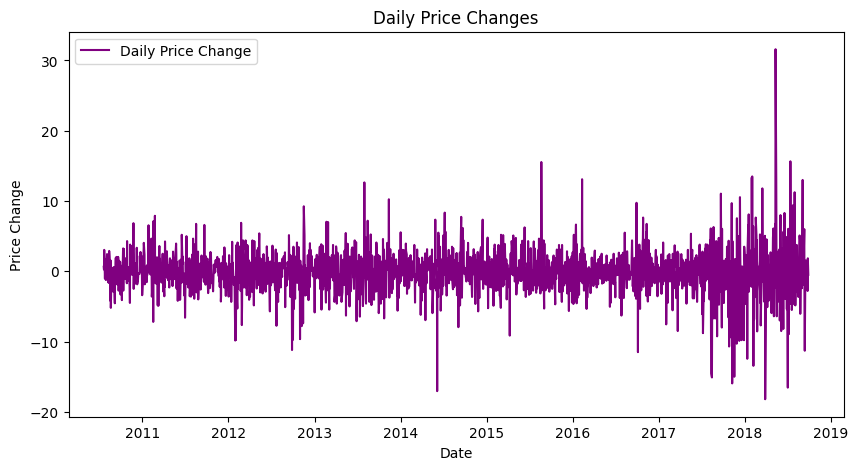

In [9]:
# Daily Price Changes:
# This can give insights into the volatility of the stock.

# Calculate daily price changes
df['Price Change'] = df['Close'].diff()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Price Change'], label='Daily Price Change', color='purple')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.title('Daily Price Changes')
plt.legend()
plt.show()


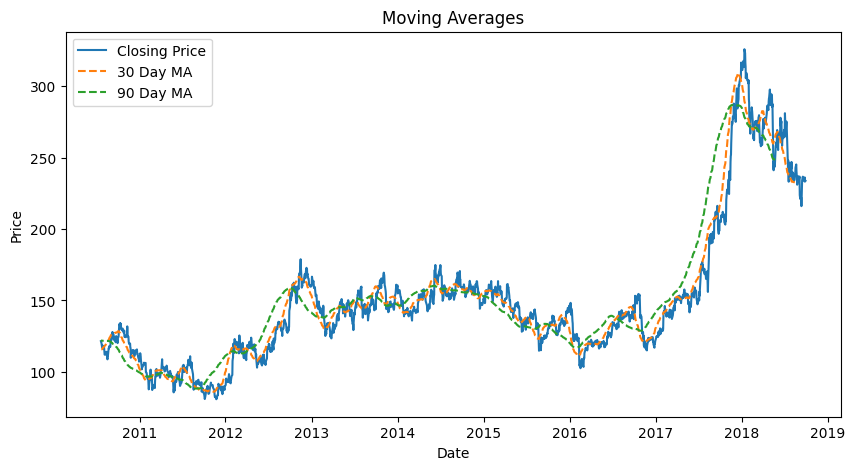

In [10]:
# Moving Averages

# Calculate 30-day moving average
df['30 Day MA'] = df['Close'].rolling(window=30).mean()

# Calculate 90-day moving average
df['90 Day MA'] = df['Close'].rolling(window=90).mean()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['30 Day MA'], label='30 Day MA', linestyle='--')
plt.plot(df['Date'], df['90 Day MA'], label='90 Day MA', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages')
plt.legend()
plt.show()

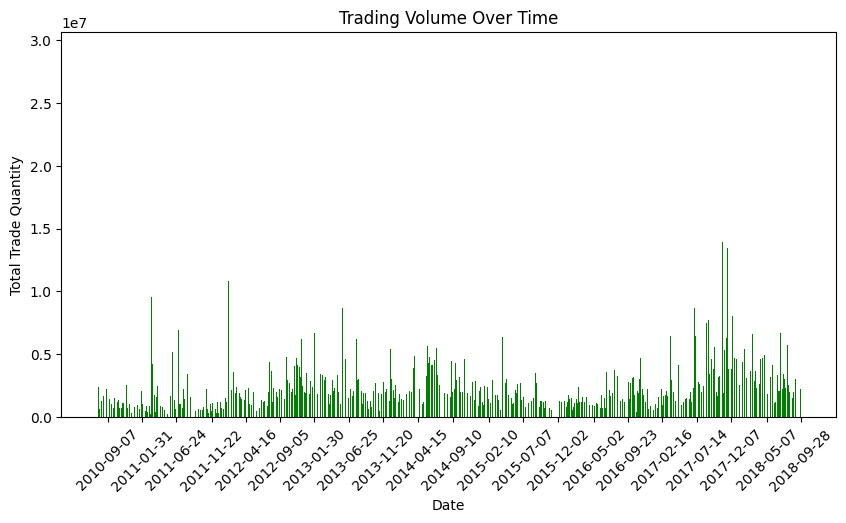

In [11]:
#trading volume :

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(df['Date'], df['Total Trade Quantity'], color='green')
plt.xlabel('Date')
plt.ylabel('Total Trade Quantity')
plt.title('Trading Volume Over Time')
plt.xticks(df['Date'][::100], rotation=45)  # Show every 100th date for better visibility
plt.show()

<ipython-input-12-c781ad992519>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


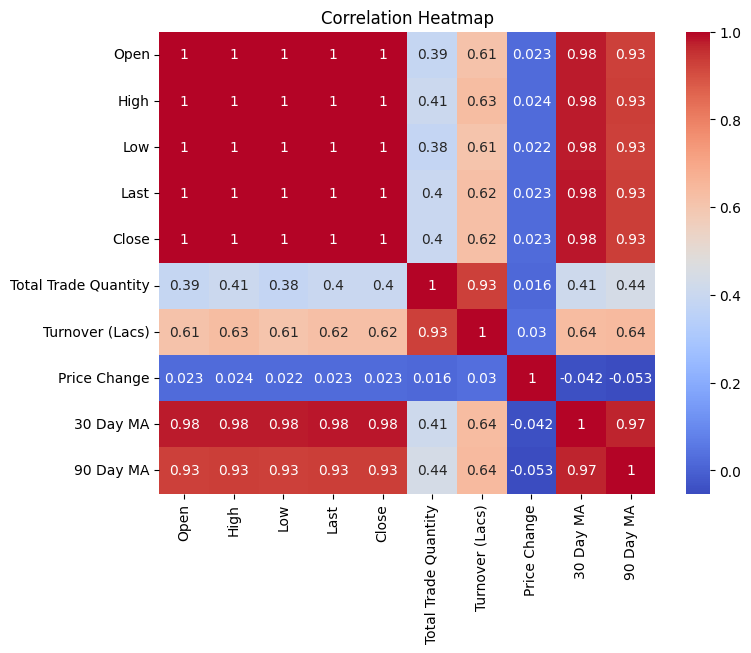

In [12]:
# Correlation Analysis:

# Calculate correlations
correlations = df.corr()

# Plotting a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Price Change,30 Day MA,90 Day MA
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,NaN,NaN,NaN
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,-0.50,NaN,NaN
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,1.00,NaN,NaN
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,1.85,NaN,NaN
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,-2.80,NaN,NaN


In [14]:
df.isnull().sum()

Date                     0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
Total Trade Quantity     0
Turnover (Lacs)          0
Price Change             1
30 Day MA               29
90 Day MA               89
dtype: int64

In [15]:
# filling 0 to null values
df.fillna(0, inplace=True)


In [16]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Price Change,30 Day MA,90 Day MA
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,0.00,0.0,0.0
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,-0.50,0.0,0.0
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,1.00,0.0,0.0
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,1.85,0.0,0.0
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,-2.80,0.0,0.0


## Data Transformation

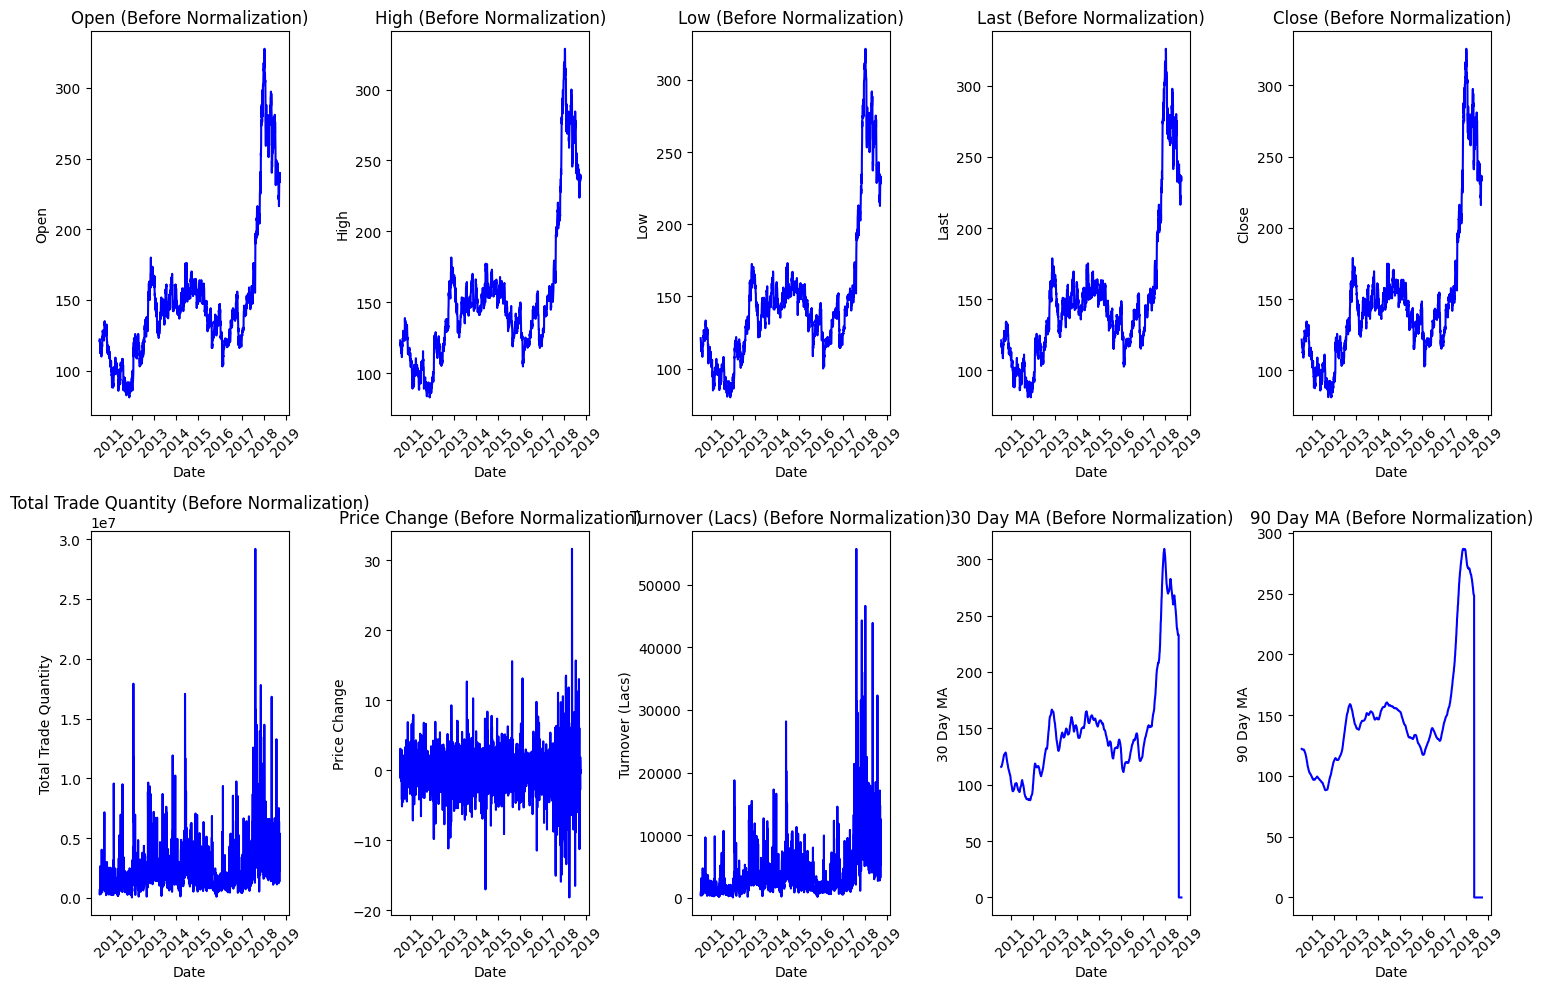

In [17]:
# Define a list of features for visualization
features = ['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity','Price Change', 'Turnover (Lacs)', '30 Day MA', '90 Day MA']

# Plot features before normalization
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 5, i+1)
    plt.plot(df['Date'], df[feature], color='blue')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.title(f'{feature} (Before Normalization)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [18]:
# Extracting the selected columns
data_to_normalize = df[features].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data_to_normalize)

# Creating a DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=features)

# Combining the normalized columns with the non-normalized columns (like 'Date')
normalized_df[['Date']] = df[['Date']]

# Display the first few rows of the normalized dataset
normalized_df.head()



,Open,High,Low,Last,Close,Total Trade Quantity,Price Change,Turnover (Lacs),30 Day MA,90 Day MA,Date
0,0.620235,0.622688,0.621560,0.622576,0.624183,0.103951,0.365462,0.127882,0.0,0.0,2018-09-28
1,0.622263,0.626144,0.625285,0.623801,0.622141,0.173002,0.355422,0.212192,0.0,0.0,2018-09-27
2,0.644363,0.639154,0.631078,0.628700,0.626225,0.075513,0.385542,0.093535,0.0,0.0,2018-09-26
3,0.617194,0.625940,0.629009,0.633803,0.633783,0.079233,0.402610,0.098117,0.0,0.0,2018-09-25
4,0.618208,0.635902,0.623836,0.624617,0.622345,0.116080,0.309237,0.142907,0.0,0.0,2018-09-24


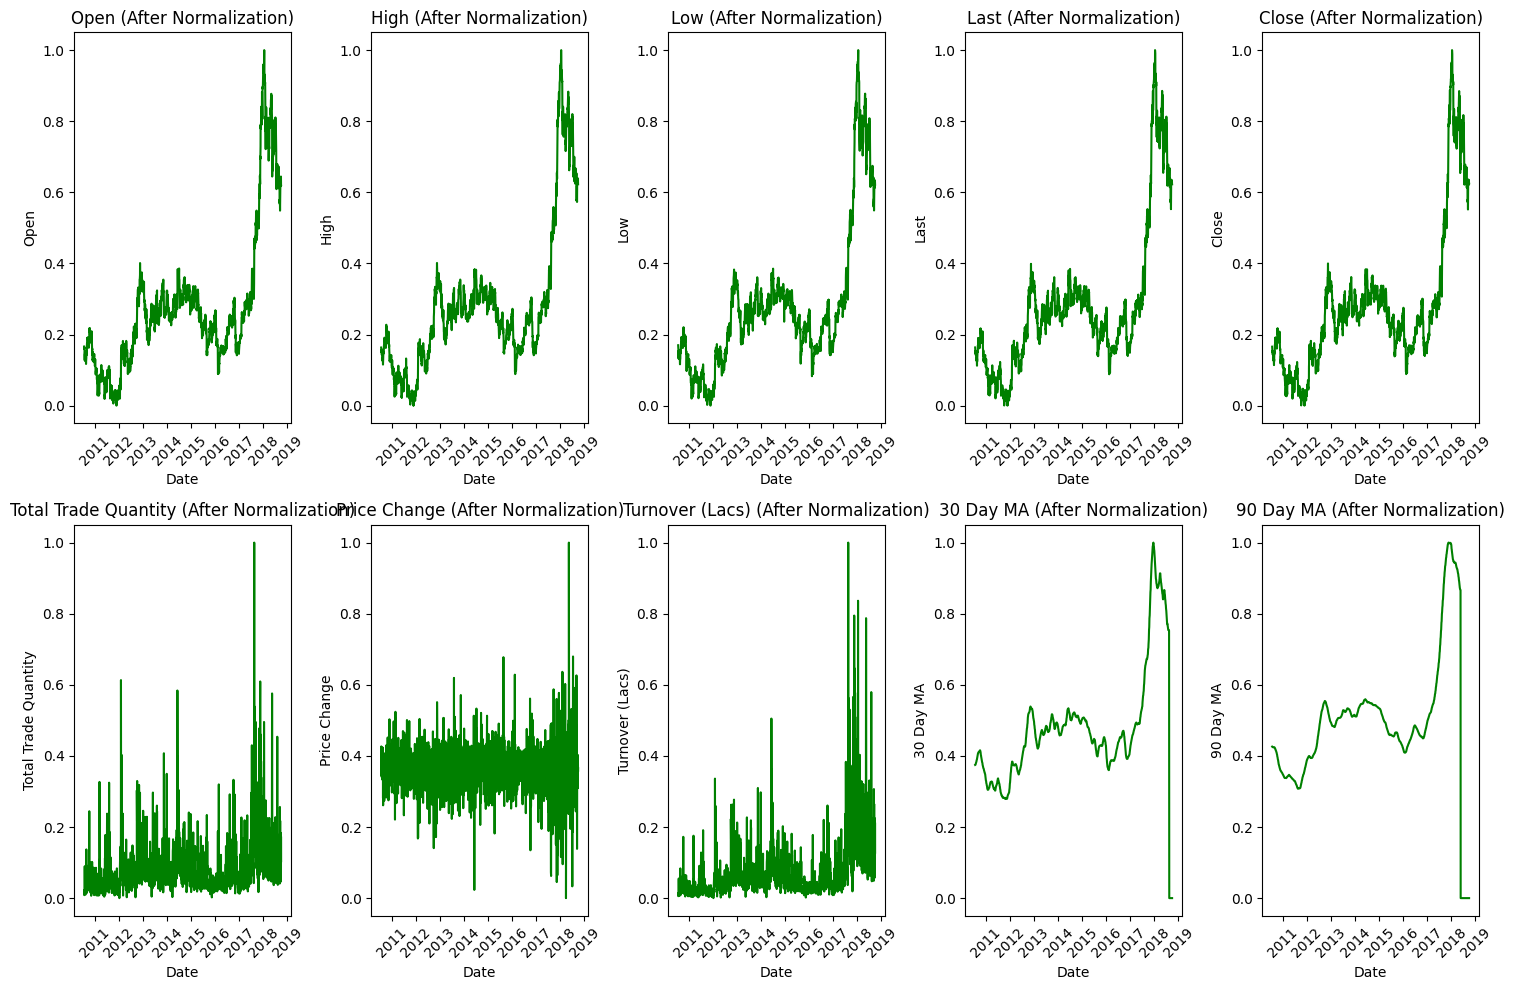

In [19]:
# Plot features after normalization
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 5, i+1)
    plt.plot(df['Date'], normalized_data[:, i], color='green')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.title(f'{feature} (After Normalization)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Prepare Data for LSTM

In [22]:
X, y = [], []

# Assuming you want to predict 'Close'
target_column_index = features.index('Close')

for i in range(60, len(normalized_data)):
    X.append(normalized_data[i-60:i, :])
    y.append(normalized_data[i, target_column_index])

X, y = np.array(X), np.array(y)


## Train-Test Split

In [23]:
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


## Create Stacked LSTM Model

In [24]:

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error')


## Train the Model

In [25]:
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
50/50 [==============================] - 11s 85ms/step - loss: 0.0092
Epoch 2/50
50/50 [==============================] - 5s 107ms/step - loss: 0.0013
Epoch 3/50
50/50 [==============================] - 4s 84ms/step - loss: 0.0011
Epoch 4/50
50/50 [==============================] - 4s 84ms/step - loss: 0.0010
Epoch 5/50
50/50 [==============================] - 6s 114ms/step - loss: 9.2450e-04
Epoch 6/50
50/50 [==============================] - 4s 84ms/step - loss: 9.5070e-04
Epoch 7/50
50/50 [==============================] - 4s 85ms/step - loss: 8.0209e-04
Epoch 8/50
50/50 [==============================] - 5s 109ms/step - loss: 7.0890e-04
Epoch 9/50
50/50 [==============================] - 4s 85ms/step - loss: 6.4860e-04
Epoch 10/50
50/50 [==============================] - 5s 91ms/step - loss: 5.3958e-04
Epoch 11/50
50/50 [==============================] - 5s 101ms/step - loss: 5.3404e-04
Epoch 12/50
50/50 [==============================] - 4s 85ms/step - loss: 4.8318e-04


## Evaluation

In [27]:
# Predict the stock prices
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(np.concatenate((predicted_stock_prices, np.zeros((predicted_stock_prices.shape[0], len(features)-1))), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], len(features)-1))), axis=1))[:, 0]

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predicted_stock_prices)
print(f"Mean Squared Error: {mse}")





13/13 [==============================] - 1s 72ms/step
Mean Squared Error: 9.253091980549323


##  Visualize Results

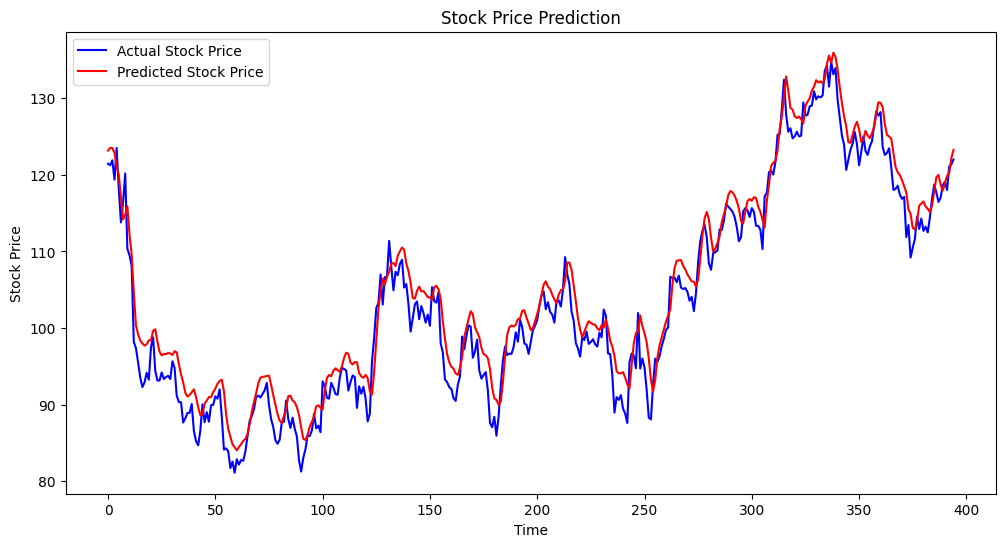

In [28]:
# Visualize the results

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_prices, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()